# Notebook for the Neural Networks Code

## Importing Libraries

In [1]:
#!pip install torch
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [2]:
data_original=pd.read_csv('/Users/prerna/PycharmProjects/blah/data/forestfires.csv')

In [3]:
data_original.head(2)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0


In [4]:
data=data_original.copy()

## EDA

### Understanding the variables
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 


In [5]:
## Validating Data size
len(data)

517

In [6]:
## Checking for Non-null counts and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [7]:
## Re-validating the null values count
data.dropna(inplace=True)
print(data.isna().sum()/len(data))

X        0.0
Y        0.0
month    0.0
day      0.0
FFMC     0.0
DMC      0.0
DC       0.0
ISI      0.0
temp     0.0
RH       0.0
wind     0.0
rain     0.0
area     0.0
dtype: float64


In [8]:
## Checking Summary statistics for the data
print(data.describe())

                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain         area  
count  517.000000  517.000000  517.000000  517.000000   517.000000  
mean    18.889168   44.288201    4.017602    0.021663    12.847292  
std      5.806625   16.317469    1.791653    0.295959    63.655

In [9]:
## Converting 'month' to numerical column using datetime conversion
data['month_n'] = pd.to_datetime(data.month, format='%b', errors='coerce').dt.month

<AxesSubplot:xlabel='month_n', ylabel='Density'>

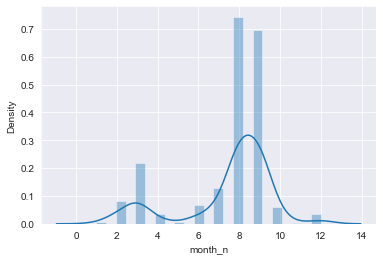

In [10]:
## Checking data distribution for 'month_n'
sns.distplot(data['month_n'])

In [11]:
## Tried date time conversion for 'day' but did not work
#data['d']= data['day'].str.title()
#data['date_n']=pd.to_datetime(data['d'], errors='coerce', format='%a')

In [12]:
## Encoding 'day' column 
weekday_map = {'Mon': 1,'Tue': 2,'Wed': 3,'Thu': 4,'Fri': 5,'Sat': 6,'Sun': 7}
# Apply the mapping to the 'Day' column
data['day_n'] = data['day'].str.title().map(weekday_map)


<AxesSubplot:xlabel='day_n', ylabel='Density'>

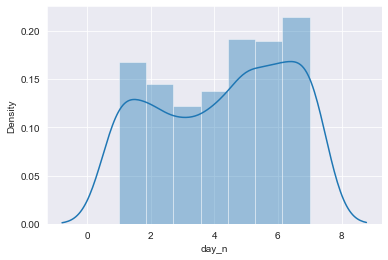

In [13]:
## Checking data distribution for 'day_n'
sns.distplot(data['day_n'])

### Dropping Categorical columns

In [14]:
data.drop(['month',	'day'], axis=1, inplace=True)

### Checking for data distribution for other variables

<AxesSubplot:xlabel='X', ylabel='Density'>

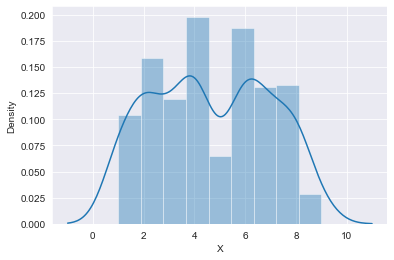

In [15]:
sns.distplot(data.X)

<AxesSubplot:xlabel='Y', ylabel='Density'>

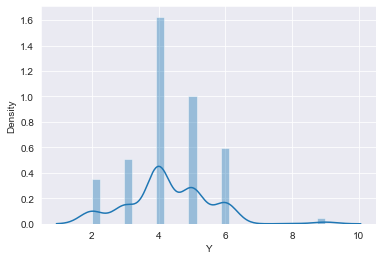

In [16]:
sns.distplot(data.Y)

<AxesSubplot:xlabel='FFMC', ylabel='Density'>

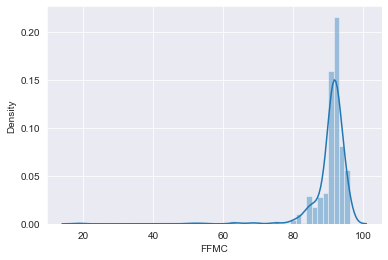

In [17]:
sns.distplot(data.FFMC)

<AxesSubplot:xlabel='DMC', ylabel='Density'>

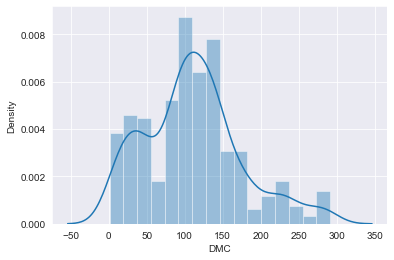

In [18]:
sns.distplot(data.DMC)

<AxesSubplot:xlabel='DC', ylabel='Density'>

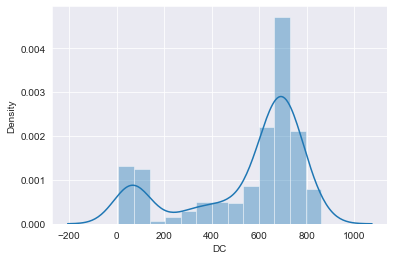

In [19]:
sns.distplot(data.DC)

<AxesSubplot:xlabel='ISI', ylabel='Density'>

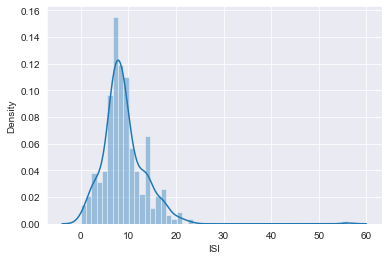

In [20]:
sns.distplot(data.ISI)

<AxesSubplot:xlabel='temp', ylabel='Density'>

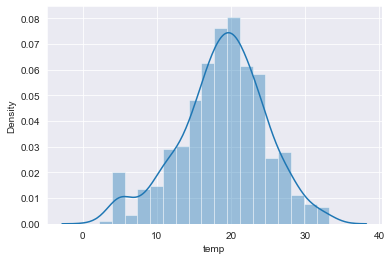

In [21]:
sns.distplot(data.temp)

<AxesSubplot:xlabel='RH', ylabel='Density'>

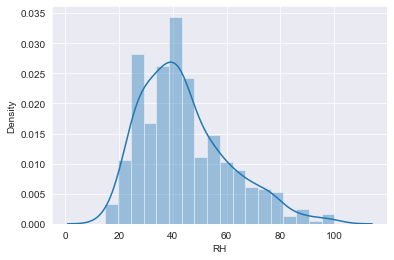

In [22]:
sns.distplot(data.RH)

<AxesSubplot:xlabel='RH', ylabel='Density'>

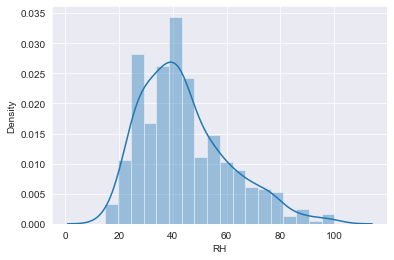

In [23]:
sns.distplot(data.RH)

<AxesSubplot:xlabel='wind', ylabel='Density'>

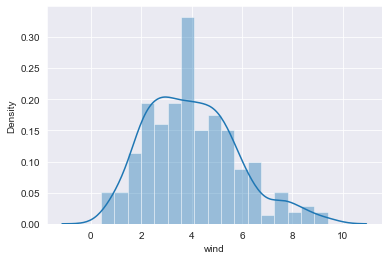

In [24]:
sns.distplot(data.wind)

<AxesSubplot:xlabel='rain', ylabel='Density'>

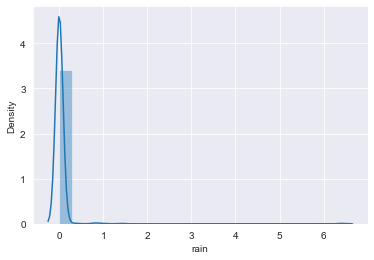

In [25]:
sns.distplot(data.rain)

### Checking for relationship within Variables

<AxesSubplot:>

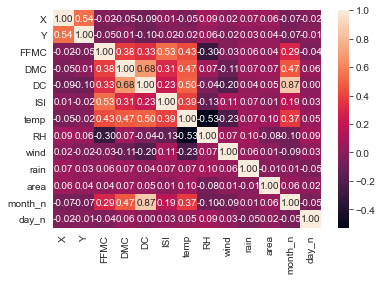

In [26]:
## Using correlation to identify relationship within the variables
data_corr= data.corr()
sns.heatmap(data_corr, annot=True, fmt='.2f')

### Checking for Outliers

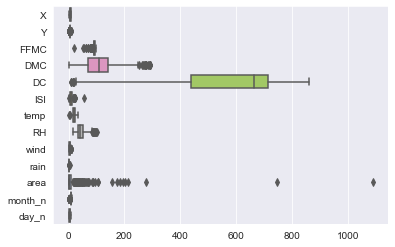

In [27]:
ax = sns.boxplot(data=data, orient="h", palette="Set2")

<AxesSubplot:xlabel='area', ylabel='Density'>

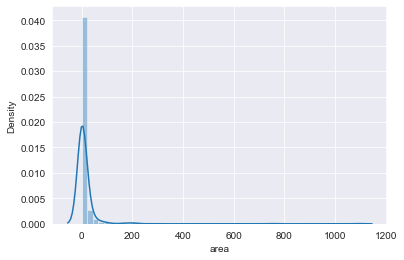

In [28]:
sns.distplot(data.area)

In [29]:
np.percentile(data.area,75)

6.57

### Outliers Treatment

The outliers are identified in multiple columns as visible from the Boxplot. Therefore, it is important to identify and deal with outliers across all  the variables. 

To take a more relaxed approach the outliers are checked between the intervals of 20 and 80 percentiles, and are replaced with the lower limit and upper limit values

In [30]:
# Function to clean or adjust a column based on percentiles
def clean_column(column):
    q20 = column.quantile(0.20)
    q80 = column.quantile(0.80)
    lower_limit = max(q20, 0)  # Ensure lower limit is non-negative
    upper_limit = q80

    # Apply logic to replace values
    return column.apply(lambda x: lower_limit if x < q20 else (upper_limit if x > q80 else x))

# Apply the cleaning function to all columns in the DataFrame
data_cleaned = data.apply(lambda col: clean_column(col) if col.dtype in ['float64', 'int64'] else col)

# Display the cleaned data
print(data_cleaned.head())


     X    Y  FFMC   DMC     DC  ISI   temp    RH  wind  rain  area  month_n  \
0  7.0  5.0  89.7  49.5  323.3  6.2  14.42  51.0   5.4   0.0   0.0      6.2   
1  7.0  4.0  90.6  49.5  669.1  6.7  18.00  33.0   2.2   0.0   0.0      9.0   
2  7.0  4.0  90.6  49.5  686.9  6.7  14.60  33.0   2.2   0.0   0.0      9.0   
3  7.0  5.0  91.7  49.5  323.3  9.0  14.42  57.0   4.0   0.0   0.0      6.2   
4  7.0  5.0  89.7  51.3  323.3  9.6  14.42  57.0   2.2   0.0   0.0      6.2   

   day_n  
0    5.0  
1    2.0  
2    6.0  
3    5.0  
4    6.0  


#### Before Removing Outliers: Area

<AxesSubplot:xlabel='area', ylabel='Density'>

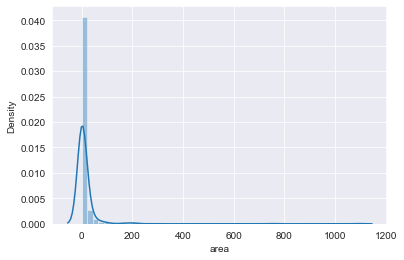

In [31]:
sns.distplot(data.area)

#### After Removing Outliers: Area

<AxesSubplot:xlabel='area', ylabel='Density'>

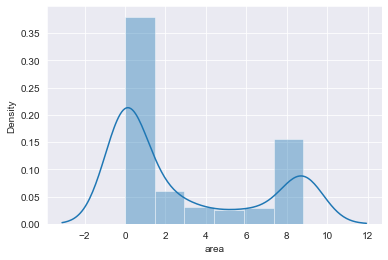

In [32]:
sns.distplot(data_cleaned.area)

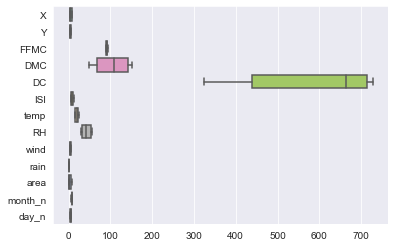

In [33]:
ax = sns.boxplot(data=data_cleaned, orient="h", palette="Set2")

### Log Transformation: Area

Given the variable had around 40% of values as 0, so log transformation was applied.

When compared the distribution of with and without Log Transformation, no significant difference was observed. Therefore, it was not considered for the modelling purpose.

In [34]:
# Apply log transformation with shift of 1
data_cleaned['area_log'] = np.log(data_cleaned['area'] + 1)

<AxesSubplot:xlabel='area_log', ylabel='Density'>

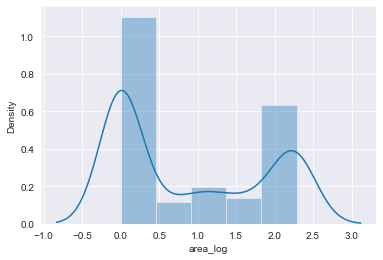

In [35]:
sns.distplot(data_cleaned.area_log)

In [36]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(method='yeo-johnson')
data_transformed = transformer.fit_transform(data_cleaned)
data1=pd.DataFrame(data_transformed, columns= data_cleaned.columns)


## Defining MLFlow Workflow

In [37]:
## Defining tracking server URI that MLflow should communicate with logging and managing experiments 
import mlflow

mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")


### Defining Model Features and Target

In [38]:
features_ = data1[['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
        'month_n', 'day_n']]
target_ = data1[['area']]

## Train-Test Split

In [39]:
## Using 70-30 split for dividing Training and Test Data
#X_train, X_test, y_train, y_test = train_test_split(
    #features_, target_, test_size=0.25, random_state=42)

In [40]:
# First, split into 70% training and 30% temporary (test+validation)
X_train, X_temp, y_train, y_temp = train_test_split(
    features_, target_, test_size=0.30, random_state=42)

# Now, split the temporary data (X_temp, y_temp) into 50% validation and 50% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.60, random_state=42)

<AxesSubplot:ylabel='Density'>

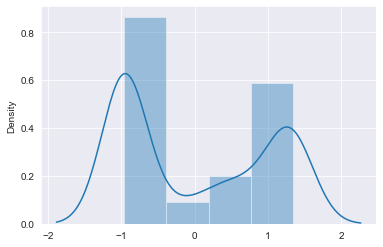

In [41]:
sns.distplot(y_train)

<AxesSubplot:ylabel='Density'>

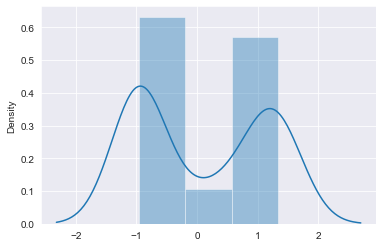

In [42]:
sns.distplot(y_val)

<AxesSubplot:ylabel='Density'>

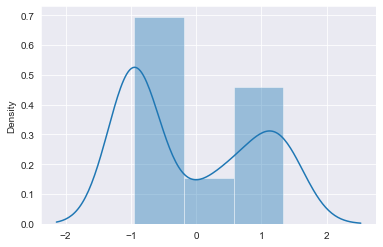

In [43]:
sns.distplot(y_test)

In [44]:
len(features_.columns)

12

## Setting the MLFlow Experiment

In [45]:

import mlflow.pytorch

In [46]:
mlflow.set_experiment("MLflow_P")

<Experiment: artifact_location='mlflow-artifacts:/794128410354127250', creation_time=1734014516146, experiment_id='794128410354127250', last_update_time=1734014516146, lifecycle_stage='active', name='MLflow_P', tags={}>

In [47]:
# Enable autologging for PyTorch
def start_autologging():
    mlflow.pytorch.autolog()

### Defining the Regression Model

In [48]:
# Define the RegressionModel class
import torch.nn.functional as F
class RegressionModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RegressionModel, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)  # Adjusted to handle `input_size` features
        self.output = nn.Linear(hidden_size, output_size)  # Output layer

    def forward(self, x):
        x = F.elu(self.hidden(x))  # Apply eLU activation function
        x = self.output(x)  # Output layer
        return x




### Model Optimisation using Hyperparameters

In [49]:
# # Hyperparameters
learning_rate = 0.01  #  learning rates
hidden_sizes = [10, 20, 30]  #  hidden sizes
epochs = 1000
input_size = 12  # Number of features
output_size = 1

In [50]:
hidden_sizes = [64, 128, 256]  # Example list of hidden layer sizes
learning_rates = [0.001, 0.01, 0.1]  # Example learning rates
epochs = 1000  # Number of epochs
input_size = X_train.shape[1]  # Number of features
output_size = 1  # Assuming it's a regression problem

In [51]:
X_train = torch.tensor(X_train.values, dtype=torch.float32)  # Convert DataFrame to NumPy, then to Tensor
y_train = torch.tensor(y_train.values, dtype=torch.float32)

Epoch [100/1000], Train Loss: 0.8176
Epoch [200/1000], Train Loss: 0.6547
Epoch [300/1000], Train Loss: 0.5043
Epoch [400/1000], Train Loss: 0.3771
Epoch [500/1000], Train Loss: 0.2727
Epoch [600/1000], Train Loss: 0.1926
Epoch [700/1000], Train Loss: 0.1421
Epoch [800/1000], Train Loss: 0.1092
Epoch [900/1000], Train Loss: 0.0889
Epoch [1000/1000], Train Loss: 0.0740


2024/12/15 23:19:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run awesome-conch-881 at: http://127.0.0.1:5000/#/experiments/794128410354127250/runs/133473735ab241468554614c2124c758.
2024/12/15 23:19:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/794128410354127250.


Epoch [100/1000], Train Loss: 0.2026
Epoch [200/1000], Train Loss: 0.0726
Epoch [300/1000], Train Loss: 0.0496
Epoch [400/1000], Train Loss: 0.0394
Epoch [500/1000], Train Loss: 0.0337
Epoch [600/1000], Train Loss: 0.0318
Epoch [700/1000], Train Loss: 0.0293
Epoch [800/1000], Train Loss: 0.0340
Epoch [900/1000], Train Loss: 0.0263
Epoch [1000/1000], Train Loss: 0.0256


2024/12/15 23:20:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run likeable-stork-276 at: http://127.0.0.1:5000/#/experiments/794128410354127250/runs/36f0b968fc484d8db9e103debc785938.
2024/12/15 23:20:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/794128410354127250.


Epoch [100/1000], Train Loss: 0.1805
Epoch [200/1000], Train Loss: 0.1040
Epoch [300/1000], Train Loss: 0.0706
Epoch [400/1000], Train Loss: 0.0757
Epoch [500/1000], Train Loss: 0.0995
Epoch [600/1000], Train Loss: 0.0397
Epoch [700/1000], Train Loss: 0.1315
Epoch [800/1000], Train Loss: 0.0388
Epoch [900/1000], Train Loss: 0.0393
Epoch [1000/1000], Train Loss: 0.0292


2024/12/15 23:20:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run awesome-fox-259 at: http://127.0.0.1:5000/#/experiments/794128410354127250/runs/dcb76e0a5acd4c8cab1a9bc65f87b6b3.
2024/12/15 23:20:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/794128410354127250.


Epoch [100/1000], Train Loss: 0.7363
Epoch [200/1000], Train Loss: 0.5284
Epoch [300/1000], Train Loss: 0.3319
Epoch [400/1000], Train Loss: 0.1933
Epoch [500/1000], Train Loss: 0.1132
Epoch [600/1000], Train Loss: 0.0723
Epoch [700/1000], Train Loss: 0.0517
Epoch [800/1000], Train Loss: 0.0411
Epoch [900/1000], Train Loss: 0.0354
Epoch [1000/1000], Train Loss: 0.0319


2024/12/15 23:20:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run bouncy-stoat-389 at: http://127.0.0.1:5000/#/experiments/794128410354127250/runs/1707c12a82ad47e69fd27136ffa7f9c0.
2024/12/15 23:20:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/794128410354127250.


Epoch [100/1000], Train Loss: 0.1411
Epoch [200/1000], Train Loss: 0.0494
Epoch [300/1000], Train Loss: 0.0394
Epoch [400/1000], Train Loss: 0.0330
Epoch [500/1000], Train Loss: 0.0322
Epoch [600/1000], Train Loss: 0.0267
Epoch [700/1000], Train Loss: 0.0249
Epoch [800/1000], Train Loss: 0.0312
Epoch [900/1000], Train Loss: 0.0228
Epoch [1000/1000], Train Loss: 0.0233


2024/12/15 23:20:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run likeable-trout-816 at: http://127.0.0.1:5000/#/experiments/794128410354127250/runs/278f716f5b5f472ba69fc4e2911adf4b.
2024/12/15 23:20:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/794128410354127250.


Epoch [100/1000], Train Loss: 0.1609
Epoch [200/1000], Train Loss: 0.0643
Epoch [300/1000], Train Loss: 0.0872
Epoch [400/1000], Train Loss: 0.0338
Epoch [500/1000], Train Loss: 0.0322
Epoch [600/1000], Train Loss: 0.1149
Epoch [700/1000], Train Loss: 0.0498
Epoch [800/1000], Train Loss: 0.0275
Epoch [900/1000], Train Loss: 0.0357
Epoch [1000/1000], Train Loss: 0.0244


2024/12/15 23:20:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run dazzling-asp-971 at: http://127.0.0.1:5000/#/experiments/794128410354127250/runs/ed43eab841504780ba724373e7382275.
2024/12/15 23:20:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/794128410354127250.


Epoch [100/1000], Train Loss: 0.7069
Epoch [200/1000], Train Loss: 0.4243
Epoch [300/1000], Train Loss: 0.1927
Epoch [400/1000], Train Loss: 0.0905
Epoch [500/1000], Train Loss: 0.0530
Epoch [600/1000], Train Loss: 0.0384
Epoch [700/1000], Train Loss: 0.0324
Epoch [800/1000], Train Loss: 0.0289
Epoch [900/1000], Train Loss: 0.0265
Epoch [1000/1000], Train Loss: 0.0248


2024/12/15 23:20:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run worried-gnat-282 at: http://127.0.0.1:5000/#/experiments/794128410354127250/runs/acab9bc88f334636a2a2048be1f8591e.
2024/12/15 23:20:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/794128410354127250.


Epoch [100/1000], Train Loss: 0.1020
Epoch [200/1000], Train Loss: 0.0396
Epoch [300/1000], Train Loss: 0.0300
Epoch [400/1000], Train Loss: 0.0277
Epoch [500/1000], Train Loss: 0.0246
Epoch [600/1000], Train Loss: 0.0234
Epoch [700/1000], Train Loss: 0.0220
Epoch [800/1000], Train Loss: 0.0214
Epoch [900/1000], Train Loss: 0.0202
Epoch [1000/1000], Train Loss: 0.0208


2024/12/15 23:20:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run victorious-vole-908 at: http://127.0.0.1:5000/#/experiments/794128410354127250/runs/e25aca2c10d646499f322ceba2c1d3a0.
2024/12/15 23:20:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/794128410354127250.


Epoch [100/1000], Train Loss: 0.1334
Epoch [200/1000], Train Loss: 0.1693
Epoch [300/1000], Train Loss: 0.0859
Epoch [400/1000], Train Loss: 0.0620
Epoch [500/1000], Train Loss: 0.0556
Epoch [600/1000], Train Loss: 0.0217
Epoch [700/1000], Train Loss: 0.0320
Epoch [800/1000], Train Loss: 0.0365
Epoch [900/1000], Train Loss: 0.0259
Epoch [1000/1000], Train Loss: 0.0221


2024/12/15 23:20:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run adorable-conch-523 at: http://127.0.0.1:5000/#/experiments/794128410354127250/runs/233476d7c38544bb916bc31610682865.
2024/12/15 23:20:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/794128410354127250.
2024/12/15 23:20:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/15 23:20:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run monumental-snake-727 at: http://127.0.0.1:5000/#/experiments/794128410354127250/runs/a79cd9adef1e4a5eb340fd1d28962f0d.
2024/12/15 23:20:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/794128410354127250.


Best model found with validation loss: 1.4068


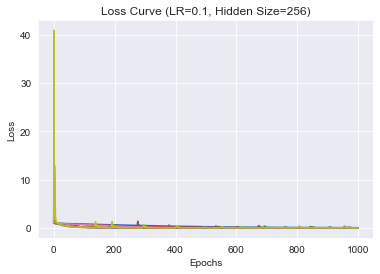

In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
import mlflow
import mlflow.pytorch
import matplotlib.pyplot as plt
from mlflow.models.signature import infer_signature

# Define your model (assuming `RegressionModel` is defined elsewhere)
class RegressionModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# Assuming X_train, y_train, X_test, and y_test are already defined as PyTorch tensors
# X_train = ...
# y_train = ...
# X_test = ...
# y_test = ...

# Hyperparameters to test


best_model = None
best_val_loss = float('inf')  # Start with a large value to track the best model

# Loop over different learning rates and hidden sizes
for hidden_size in hidden_sizes:
    for learning_rate in learning_rates:
        with mlflow.start_run():
            # Log hyperparameters for each run
            mlflow.log_param("hidden_neurons", hidden_size)
            mlflow.log_param("learning_rate", learning_rate)
            mlflow.log_param("epochs", epochs)
            mlflow.log_param("input_size", input_size)

            # Instantiate model, loss function, and optimizer
            model = RegressionModel(input_size=input_size, hidden_size=hidden_size, output_size=output_size)
            criterion = nn.MSELoss()
            optimizer = optim.Adam(model.parameters(), lr=learning_rate)

            # Training loop
            train_losses = []
            for epoch in range(epochs):
                model.train()

                # Forward pass: Compute predicted y by passing x to the model
                y_pred = model(X_train)

                # Compute the loss
                loss = criterion(y_pred, y_train)
                train_losses.append(loss.item())

                # Zero the gradients before the backward pass
                optimizer.zero_grad()

                # Backward pass: Compute gradient of the loss with respect to the model parameters
                loss.backward()

                # Update the model parameters
                optimizer.step()

                # Log the loss to MLflow at each epoch
                mlflow.log_metric("train_loss", loss.item(), step=epoch)

                if (epoch + 1) % 100 == 0:
                    print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}')
            
            # Compute validation loss (if you have validation data)
            # X_val = torch.tensor(X_val.values, dtype=torch.float32)  # Convert DataFrame to NumPy, then to Tensor
            # y_val = torch.tensor(y_val.values, dtype=torch.float32)
            # X_test = torch.tensor(X_test.values, dtype=torch.float32)  # Convert DataFrame to NumPy, then to Tensor
            # y_test = torch.tensor(y_test.values, dtype=torch.float32)
            model.eval()
            with torch.no_grad():
                y_val_pred = model(X_val)  # Using X_test for validation
                val_loss = criterion(y_val_pred, y_val)
                y_test_pred = model(X_test)  # Using X_test for validation
                test_loss = criterion(y_test_pred, y_test)
            
            # Log the validation loss
            mlflow.log_metric("val_loss", val_loss.item())

            # Track best model based on validation loss
            if val_loss.item() < best_val_loss:
                best_val_loss = val_loss.item()
                best_model = model

            # Define the signature using infer_signature from the data
            signature = infer_signature(features_.values, target_.values)

            # Log the trained model with the inferred signature
            mlflow.pytorch.log_model(model, "model", signature=signature)

            # Plot loss curve
            plt.plot(range(epochs), train_losses)
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.title(f'Loss Curve (LR={learning_rate}, Hidden Size={hidden_size})')
            plot_filename = f"loss_curve_lr_{learning_rate}_hs_{hidden_size}.png"
            plt.savefig(plot_filename)
            mlflow.log_artifact(plot_filename)

# After hyperparameter search, log the best model based on validation performance
if best_model is not None:
    with mlflow.start_run():
        mlflow.log_param("best_model", "True")
        mlflow.pytorch.log_model(best_model, "best_model")
        print(f"Best model found with validation loss: {best_val_loss:.4f}")


In [110]:
#mlflow.end_run()

In [107]:
# Log hyperparameters manually
mlflow.log_param("input_size", input_size)
mlflow.log_param("hidden_size", hidden_size)
mlflow.log_param("output_size", output_size)
mlflow.log_param("learning_rate", learning_rate)
mlflow.log_param("epochs", epochs)

1000

## Model Metrics

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn.metrics import r2_score, mean_squared_error
import mlflow

# 
# X_val = torch.tensor(X_val.values, dtype=torch.float32)  # Convert DataFrame to NumPy, then to Tensor
# y_val = torch.tensor(y_val.values, dtype=torch.float32)
# X_test = torch.tensor(X_test.values, dtype=torch.float32)  # Convert DataFrame to NumPy, then to Tensor
# y_test = torch.tensor(y_test.values, dtype=torch.float32)
# ## Function for R² (R-squared) calculation

def r_squared(predictions, labels):
    return r2_score(labels.cpu().numpy(), predictions.cpu().detach().numpy())

# ## Function for RMSE calculation
def rmse(predictions, labels):
    return np.sqrt(mean_squared_error(labels.cpu().numpy(), predictions.cpu().detach().numpy()))

# Initialize lists to store R² and RMSE for each dataset
train_r2_scores = []
val_r2_scores = []
test_r2_scores = []

train_rmse_values = []
val_rmse_values = []
test_rmse_values = []

# Assuming X_train, y_train, X_val, y_val, X_test, and y_test are defined
# Assuming model, criterion, optimizer, and epochs are defined

for epoch in range(epochs):
    best_model.train()

    # Forward pass: Compute predicted y by passing x to the model for training data
    y_train_pred = best_model(X_train)
    
    # Compute loss for training data
    loss = criterion(y_train_pred, y_train)
    losses.append(loss.item())

    # Compute R² and RMSE for training data
    train_r2 = r_squared(y_train_pred, y_train)
    train_rmse_value = rmse(y_train_pred, y_train)

    train_r2_scores.append(train_r2)
    train_rmse_values.append(train_rmse_value)

    # Validation phase
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Turn off gradient computation for validation
        y_val_pred = best_model(X_val)
        val_r2 = r_squared(y_val_pred, y_val)
        val_rmse_value = rmse(y_val_pred, y_val)

        val_r2_scores.append(val_r2)
        val_rmse_values.append(val_rmse_value)

    # Test phase (optional but recommended for final evaluation)
    with torch.no_grad():
        y_test_pred = best_model(X_test)
        test_r2 = r_squared(y_test_pred, y_test)
        test_rmse_value = rmse(y_test_pred, y_test)

        test_r2_scores.append(test_r2)
        test_rmse_values.append(test_rmse_value)

    # Log metrics to MLflow
    mlflow.log_metric("loss", loss.item(), step=epoch)
    mlflow.log_metric("train_r2_score", train_r2, step=epoch)
    mlflow.log_metric("train_rmse", train_rmse_value, step=epoch)
    mlflow.log_metric("val_r2_score", val_r2, step=epoch)
    mlflow.log_metric("val_rmse", val_rmse_value, step=epoch)
    mlflow.log_metric("test_r2_score", test_r2, step=epoch)
    mlflow.log_metric("test_rmse", test_rmse_value, step=epoch)

    # Optional: print out the values every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, '
              f'Train R²: {train_r2:.4f}, Train RMSE: {train_rmse_value:.4f}, '
              f'Val R²: {val_r2:.4f}, Val RMSE: {val_rmse_value:.4f}, '
              f'Test R²: {test_r2:.4f}, Test RMSE: {test_rmse_value:.4f}')

    # Perform backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plot R² and RMSE curves during training
plt.figure(figsize=(12, 6))

# R² Curves
plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_r2_scores, label='Train R²', color='b')
plt.plot(range(epochs), val_r2_scores, label='Validation R²', color='g')
plt.plot(range(epochs), test_r2_scores, label='Test R²', color='r')
plt.xlabel('Epochs')
plt.ylabel('R² Score')
plt.title('R² Score during Training')
plt.legend()

# RMSE Curves
plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_rmse_values, label='Train RMSE', color='b')
plt.plot(range(epochs), val_rmse_values, label='Validation RMSE', color='g')
plt.plot(range(epochs), test_rmse_values, label='Test RMSE', color='r')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('RMSE during Training')
plt.legend()

# Save the plots
plt.tight_layout()
plt.savefig("performance_curve.png")

# Log the plots to MLflow
mlflow.log_artifact("performance_curve.png")


NameError: name 'losses' is not defined

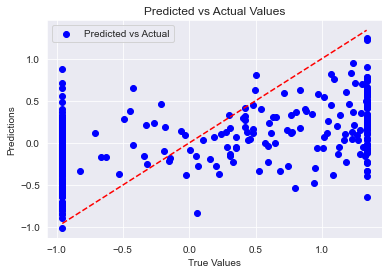

In [67]:
## Plotting predicted vs. actual values after the final epoch
with torch.no_grad():
    model.eval()
    y_pred = model(X_train)

# Convert the predictions and true values to numpy for plotting
y_pred_np = y_pred.numpy()
y_true_np = y_train.numpy()

# Predicted vs Actual plot
plt.scatter(y_true_np, y_pred_np, color='blue', label='Predicted vs Actual')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predicted vs Actual Values')
plt.plot([min(y_true_np), max(y_true_np)], [min(y_true_np), max(y_true_np)], 'r--')  # Line y=x
plt.legend()
plt.savefig("predicted_vs_actual.png")
mlflow.log_artifact("predicted_vs_actual.png")
plot_filename = "train_val_test_loss.png"
plt.savefig(plot_filename)
mlflow.log_artifact(plot_filename)

Epoch [100/1000], Train Loss: 0.7184, Learning Rate: 0.000010
Epoch [200/1000], Train Loss: 0.7172, Learning Rate: 0.000001
Epoch [300/1000], Train Loss: 0.7171, Learning Rate: 0.000000
Epoch [400/1000], Train Loss: 0.7171, Learning Rate: 0.000000
Epoch [500/1000], Train Loss: 0.7171, Learning Rate: 0.000000
Epoch [600/1000], Train Loss: 0.7171, Learning Rate: 0.000000
Epoch [700/1000], Train Loss: 0.7171, Learning Rate: 0.000000
Epoch [800/1000], Train Loss: 0.7171, Learning Rate: 0.000000
Epoch [900/1000], Train Loss: 0.7171, Learning Rate: 0.000000
Epoch [1000/1000], Train Loss: 0.7171, Learning Rate: 0.000000


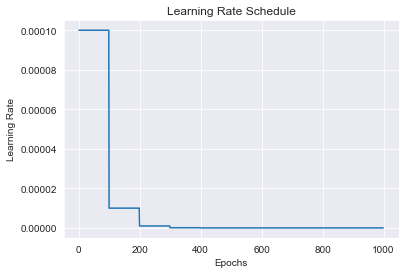

In [68]:
# Assuming you are using a scheduler like StepLR or CosineAnnealingLR
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)  # Example: decays learning rate by 0.1 every 100 epochs
learning_rates = []

for epoch in range(epochs):
    model.train()

    # Forward pass
    y_train_pred = model(X_train)
    train_loss = criterion(y_train_pred, y_train)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # Step the scheduler to update the learning rate
    scheduler.step()

    # Log learning rate
    current_lr = optimizer.param_groups[0]['lr']
    learning_rates.append(current_lr)

    mlflow.log_metric("train_loss", train_loss.item(), step=epoch)
    mlflow.log_metric("learning_rate", current_lr, step=epoch)

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss.item():.4f}, Learning Rate: {current_lr:.6f}')

# Learning rate curve plot
plt.plot(range(epochs), learning_rates)
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.savefig("learning_rate_schedule.png")
mlflow.log_artifact("learning_rate_schedule.png")
plot_filename = "learning_rate_schedule.png"
plt.savefig(plot_filename)
mlflow.log_artifact(plot_filename)


In [60]:
print(type(X_train))  # Should be <class 'pandas.core.frame.DataFrame'>
print(type(y_train))  # Should be <class 'pandas.core.series.Series'>
 # Should show numeric type, e.g., float64 or int64


<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [70]:
# Assuming X_train and y_train are pandas DataFrame and Series respectively
import numpy as np
print(f"X_train type: {type(X_train)}")
print(f"y_train type: {type(y_train)}")

# Ensure they are DataFrames and Series
if isinstance(X_train, pd.DataFrame) and isinstance(y_train, pd.Series):
    # Check the first few rows for unexpected data
    print(X_train.head())
    print(y_train.head())
else:
    print("X_train or y_train are not of the expected types.")
    # Handle this issue here (e.g., re-assign or re-load the data)
    
# Convert X_train and y_train to numpy arrays (if necessary) and handle missing data
X_train_np = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else np.array(X_train)
y_train_np = y_train.to_numpy() if isinstance(y_train, pd.Series) else np.array(y_train)

# Handle missing values (if any)
X_train_np = np.nan_to_num(X_train_np, nan=0)  # Replace NaNs with 0
y_train_np = np.nan_to_num(y_train_np, nan=0)

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_np, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_np, dtype=torch.float32)

# Print shapes of tensors (for debugging purposes)
print(f"X_train_tensor shape: {X_train_tensor.shape}")
print(f"y_train_tensor shape: {y_train_tensor.shape}")


X_train type: <class 'torch.Tensor'>
y_train type: <class 'torch.Tensor'>
X_train or y_train are not of the expected types.
X_train_tensor shape: torch.Size([361, 12])
y_train_tensor shape: torch.Size([361, 1])


In [57]:

# Assuming criterion is already defined (e.g., nn.MSELoss, nn.CrossEntropyLoss)
# If it's not defined, you can define it like this:
# criterion = nn.MSELoss()  # For regression tasks
# criterion = nn.CrossEntropyLoss()  # For classification tasks

# Function to evaluate the model loss (validation or test)
def evaluate_model(model, X_data, y_data, criterion):
    model.eval()
    # Convert to tensors if they are DataFrames
    X_data_tensor = torch.tensor(X_data.values, dtype=torch.float32)
    y_data_tensor = torch.tensor(y_data.values, dtype=torch.float32)
    
    with torch.no_grad():
        y_data_pred = model(X_data)  # Forward pass
        data_loss = criterion(y_data_pred, y_data)  # Compute loss
    return data_loss.item()

# Initialize loss tracking
train_losses = []
val_losses = []
test_losses = []  # Initialize test_losses

# Training loop
for epoch in range(epochs):
    model.train()


    # Forward pass for training data
    y_train_pred = model(X_train_tensor)  # Model output
    train_loss = criterion(y_train_pred, y_train_tensor)  # Compute loss
    train_losses.append(train_loss.item())

    # Compute validation loss
    val_loss = evaluate_model(model, X_val, y_val, criterion)
    val_losses.append(val_loss)

    # Compute test loss (for test data, not used during training)
    test_loss = evaluate_model(model, X_test, y_test, criterion)
    test_losses.append(test_loss)
    
    # Backpropagation and optimizer step
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # Log metrics to MLflow
    mlflow.log_metric("train_loss", train_loss.item(), step=epoch)
    mlflow.log_metric("val_loss", val_loss, step=epoch)
    mlflow.log_metric("test_loss", test_loss, step=epoch)

    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss:.4f}, Test Loss: {test_loss:.4f}")

# After all epochs, plot training, validation, and test loss
plt.plot(range(epochs), train_losses, label='Train Loss')
plt.plot(range(epochs), val_losses, label='Validation Loss')
plt.plot(range(epochs), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()

# Save the figure to a file
plot_filename = "train_val_test_loss.png"
plt.savefig(plot_filename)

# Log the artifact to MLflow (only once after training)
mlflow.log_artifact(plot_filename)

# Optionally, you can remove the plot file after logging it
# os.remove(plot_filename)


NameError: name 'X_train_tensor' is not defined

## Saving the Model as an Artifact

In [62]:
example= X_test.astype(np.float32)
mlflow.pytorch.log_model(model, "model",input_example=example)  # This will save the model in 


In [63]:
torch.tensor(X_test.values, dtype=torch.float32)

tensor([[  4.0000,   5.0000,  91.7000,  49.5000, 323.3000,   9.0000,  17.2000,
          30.0000,   4.5000,   0.0000,   6.2000,   5.0000],
        [  7.0000,   5.0000,  89.7000,  49.5000, 323.3000,   6.2000,  14.4200,
          51.0000,   5.4000,   0.0000,   6.2000,   5.0000],
        [  2.0000,   3.0000,  91.0000, 151.6600, 728.6000,   7.1000,  23.5800,
          41.0000,   3.6000,   0.0000,   8.0000,   5.0000],
        [  2.0000,   3.0000,  91.0000, 121.2000, 561.6000,   7.0000,  21.6000,
          30.0000,   5.4000,   0.0000,   8.0000,   2.0000],
        [  2.0000,   4.0000,  91.6000, 151.6600, 728.6000,   6.3000,  16.6000,
          57.0000,   2.7000,   0.0000,   8.0000,   4.0000],
        [  3.0000,   5.0000,  90.7000, 136.9000, 728.6000,   6.8000,  14.4200,
          39.0000,   2.7000,   0.0000,   9.0000,   4.0000],
        [  2.0000,   3.0000,  93.3000, 108.3000, 647.1000,  12.2000,  17.4000,
          43.0000,   5.4000,   0.0000,   8.0000,   2.0000],
        [  2.0000,   5.0000

In [ ]:
torch.save(model.state_dict(), 'model.pth')

In [40]:
# Defining where the model is saved
model_path = 'model.pth'  # Saved PyTorch model


In [41]:
mlflow.active_run()

<ActiveRun: >

In [41]:

# Load the logged model from the MLflow server
# Replace <run_id> with your actual run_id from MLflow
run_id = "f210974297fe4b81ad15cc4472a456d7"
logged_model = f"runs:/{run_id}/model"

# Load the model from MLflow
model = mlflow.pytorch.load_model(logged_model)

# Save the model as a .pth file
torch.save(model.state_dict(), 'model.pth')
print("Model saved as model.pth")


Model saved as model.pth


In [42]:
torch.save(model.state_dict(), 'model.pth')


In [44]:
f"{mlflow.artifacts.download_artifacts(logged_model)}/model.pth"

'/var/folders/85/73dt7rs57r59r59k2qq1tygm0000gn/T/tmp2l66uzle/model/model.pth'